# Nandakrishnan Nair - UAI/521 FE4DS Bioinformatics part - Task

Here I have chosen the following species from each category

bird : Anas_platyrhynchos

mammal: Ursus_maritimus

fish: Esox_lucius

In [ ]:
!pip install Bio

!pip install codon-bias

!pip install cai2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.3 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=59ae22c78b68e97075976599a071ba2b1d5bb0d93f74d490a99cd82361e1eb08
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
from Bio import SeqIO

# Open the .fa file
bird_file_path = "/content/Anas_platyrhynchos.fa"
mammal_file_path = "/content/Ursus_maritimus.fa"
fish_file_path = "/content/Esox_lucius.fa"


In [ ]:
import csv
from Bio import SeqIO
import numpy as np
import codonbias as cb

def gc_content(sequence):
    """Calculate GC content of a given sequence"""
    g_count = sequence.count("G")
    c_count = sequence.count("C")
    return (g_count + c_count) / len(sequence) * 100

def effective_number_of_codons(sequence):
    enc = cb.scores.EffectiveNumberOfCodons().get_score(seq=sequence)
    return enc



def calculate_gc_positions(sequence):
    """Calculate GC content at codon positions"""
    gc1 = gc_content(sequence[::3])  # First codon position (every 3rd base starting at 0)
    gc2 = gc_content(sequence[1::3])  # Second codon position (every 3rd base starting at 1)
    gc3 = gc_content(sequence[2::3])  # Third codon position (every 3rd base starting at 2)
    return gc1, gc2, gc3

species_list = ['Ursus_maritimus', 'Anas_platyrhynchos', 'Esox_lucius']

# Parse the FASTA file and process sequences
for species in species_list:
    file_path = "/content/" + species + ".fa"
    output_file = species + "_sequences.csv"
    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["ID", "Length (bp)", "GC%", "ENC", "GC1%", "GC2%", "GC3%"])
        cnt=0
        for record in SeqIO.parse(file_path, "fasta"):
            seq = str(record.seq)
            length = len(seq)
            gc_percent = gc_content(seq)
            enc = effective_number_of_codons(seq)
            gc1, gc2, gc3 = calculate_gc_positions(seq)

            if enc is not None and 20 <= enc <= 61:
              cnt+=1
              writer.writerow([record.id, length, gc_percent, enc, gc1, gc2, gc3])
        print("Counts: ",cnt)

    print(f"CSV file for {species} created successfully!")


Counts:  34052
CSV file for Ursus_maritimus created successfully!
Counts:  27233
CSV file for Anas_platyrhynchos created successfully!
Counts:  75398
CSV file for Esox_lucius created successfully!


removed sequences:  (7, 7)
        Length (bp)           GC%           ENC          GC1%          GC2%  \
count  34045.000000  34045.000000  34045.000000  34045.000000  34045.000000   
mean    1856.058041     51.813826     49.072084     54.835220     41.729551   
std     1638.436469      7.722835      4.516607      6.659663      6.591303   
min      141.000000     23.340790     30.885039     20.779221     17.187500   
25%      831.000000     45.446266     46.203145     50.404313     37.308869   
50%     1404.000000     51.813472     50.219687     54.535752     41.000000   
75%     2343.000000     58.378378     52.560431     59.170306     45.454545   
max    21237.000000     74.871795     57.508360     91.978610     92.727273   

               GC3%  
count  34045.000000  
mean      58.876699  
std       15.224732  
min       20.422535  
25%       46.212121  
50%       59.516616  
75%       71.685761  
max       98.029557  

Missing Values per Column:
ID             0
Length (bp)    0
G

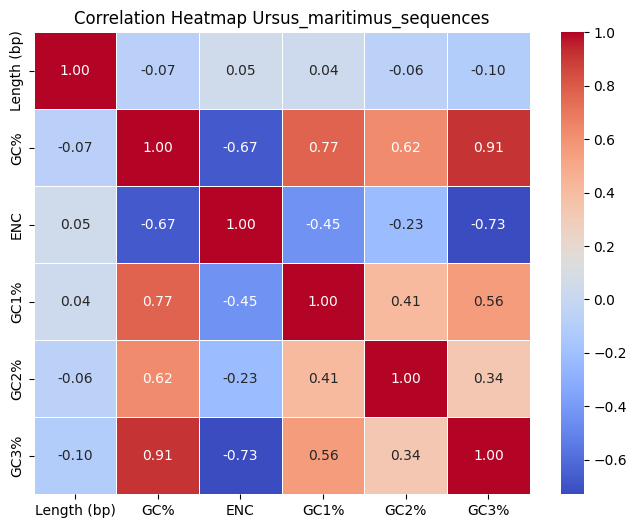

removed sequences:  (6, 7)
        Length (bp)           GC%           ENC          GC1%          GC2%  \
count  27227.000000  27227.000000  27227.000000  27227.000000  27227.000000   
mean    1916.176993     52.283157     48.703544     55.321993     42.591515   
std     1664.229770      9.077108      5.761592      6.989152      7.531746   
min      102.000000     25.641026     27.187125     25.333333     19.444444   
25%      879.000000     44.894942     46.074636     50.692267     37.610231   
50%     1431.000000     50.295639     50.880752     54.322581     41.336117   
75%     2436.000000     59.019732     52.795516     58.901550     46.410162   
max    26508.000000     84.163474     58.005246     95.078740     83.898305   

               GC3%  
count  27227.000000  
mean      58.935975  
std       17.792459  
min       20.000000  
25%       43.888889  
50%       55.374593  
75%       72.916667  
max      100.000000  

Missing Values per Column:
ID             0
Length (bp)    0
G

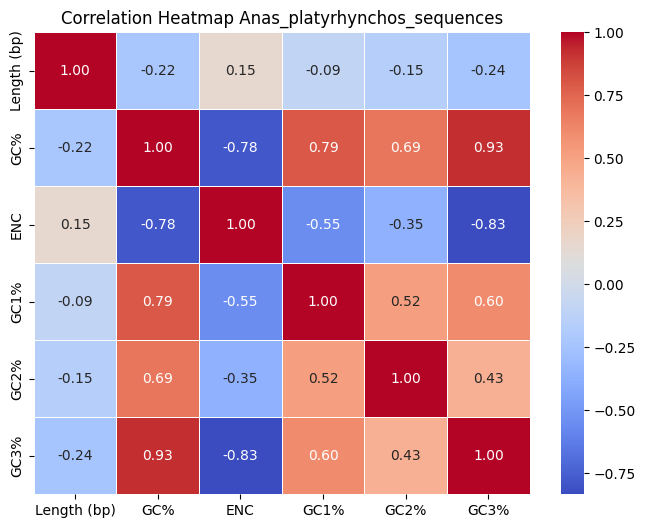

removed sequences:  (3, 7)
        Length (bp)           GC%           ENC          GC1%          GC2%  \
count  75395.000000  75395.000000  75395.000000  75395.000000  75395.000000   
mean    2108.291505     53.157991     48.912097     54.524402     41.223798   
std     1739.171694      4.600374      3.573485      5.011924      5.619720   
min      117.000000     27.407407     23.824388     12.154696     13.127413   
25%     1056.000000     50.386215     46.772903     51.651453     37.574090   
50%     1647.000000     53.397282     49.336486     54.713115     40.804598   
75%     2619.000000     56.168471     51.515033     57.624113     44.424620   
max    29847.000000     80.490956     57.711511     92.181070     92.964824   

               GC3%  
count  75395.000000  
mean      63.725773  
std        9.143961  
min        5.000000  
25%       58.402783  
50%       64.729459  
75%       69.955157  
max       94.472362  

Missing Values per Column:
ID             0
Length (bp)    0
G

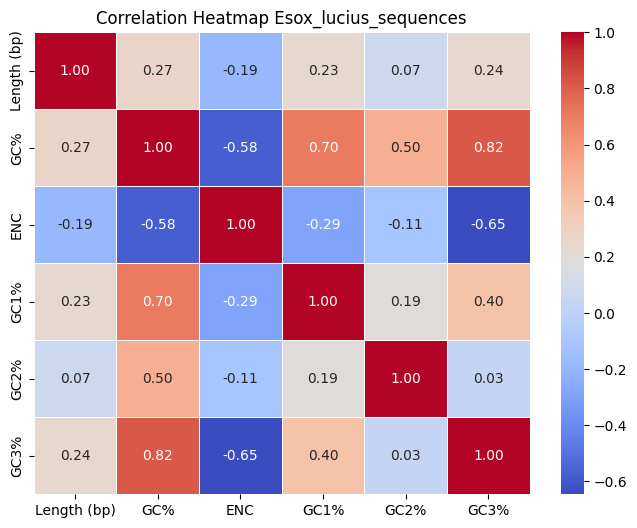

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def perform_EDA(file_path):
  df = pd.read_csv(file_path)

  # Filter out sequences shorter than 100 bp
  print("removed sequences: ",df[df['Length (bp)'] < 100].shape)
  df = df[df['Length (bp)'] >= 100]
  print(df.describe())

  missing_values = df.isnull().sum()
  print("\nMissing Values per Column:")
  print(missing_values)

  # Visualization 3: Correlation heatmap
  correlation_matrix = df[['Length (bp)', 'GC%', 'ENC', 'GC1%', 'GC2%', 'GC3%']].corr()

  plt.figure(figsize=(8, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

  # Extract the species name from the filename (assuming the species name is before "_sequences.csv")
  species_name = file_path.split('/')[-1].split('.')[0]
  plt.title(f'Correlation Heatmap {species_name}')
  plt.show()

for species in species_list:
  file_path = species + "_sequences.csv"
  perform_EDA(file_path)

**Ursus_maritimus**
Sequence Counts:  34052
Removed Sequences 7

**Anas_platyrhynchos**
Sequence Counts:  27233
Removed Sequences 6

**Esox_lucius**
Sequence Counts:  75398
Removed Sequences 3

Number of rows after removing short sequences: 27227
Number of rows after removing short sequences: 34045
Number of rows after removing short sequences: 75395


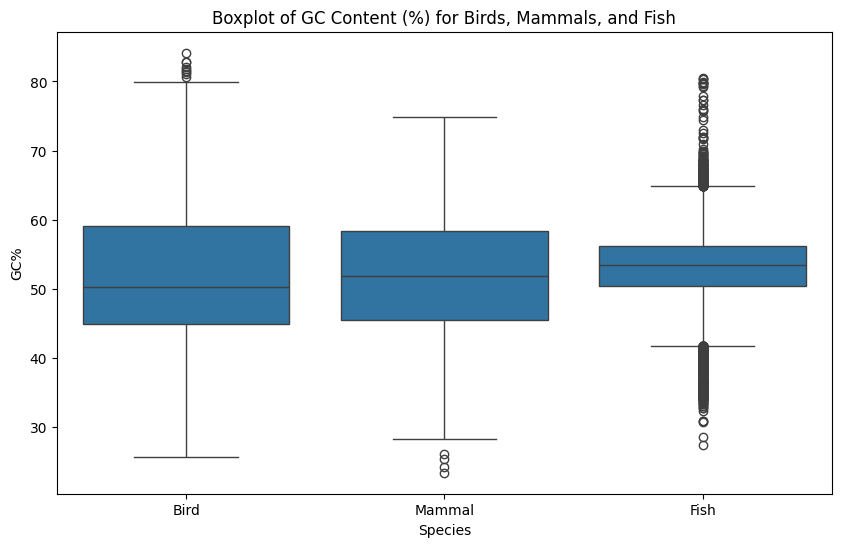

In [ ]:
# Load the dataset
bird_file_path = "/content/Anas_platyrhynchos_sequences.csv"
mammal_file_path = "/content/Ursus_maritimus_sequences.csv"
fish_file_path = "/content/Esox_lucius_sequences.csv"

def filter_sequences(file_path):
  df = pd.read_csv(file_path)
  # Filter out sequences shorter than 100 bp
  df_filtered = df[df['Length (bp)'] >= 100]
  # Check the number of rows after removing short sequences
  print(f"Number of rows after removing short sequences: {len(df_filtered)}")
  return df_filtered


bird_df = filter_sequences(bird_file_path)
mammal_df = filter_sequences(mammal_file_path)
fish_df = filter_sequences(fish_file_path)

bird_df['Species'] = 'Bird'
mammal_df['Species'] = 'Mammal'
fish_df['Species'] = 'Fish'

# Concatenate the DataFrames into one
df_combined = pd.concat([bird_df, mammal_df, fish_df])

# Create a boxplot for GC% for each species side by side
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='GC%', data=df_combined)

# Title and labels
plt.title('Boxplot of GC Content (%) for Birds, Mammals, and Fish')
plt.xlabel('Species')
plt.ylabel('GC%')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import glob

# adding labels to each csv dataframes

# Define the list of CSV file names and their corresponding labels
file_label_map = {
    'Ursus_maritimus_sequences.csv': 'Ursus_maritimus',
    'Anas_platyrhynchos_sequences.csv': 'Anas_platyrhynchos',
    'Esox_lucius_sequences.csv': 'Esox_lucius'
}

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file and label
for file, label in file_label_map.items():
    # Read the CSV into a DataFrame
    df = pd.read_csv(file)

    # Add the 'labels' column with the corresponding label
    df['labels'] = label

    # Append the DataFrame to the list
    dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())


                     ID  Length (bp)        GC%        ENC       GC1%  \
0  ENSUMAT00000000248.1          390  63.076923  45.654381  58.461538   
1  ENSUMAT00000017843.1          351  41.310541  50.122520  47.863248   
2  ENSUMAT00000017848.1          144  58.333333  47.122670  45.833333   
3  ENSUMAT00000003088.1          291  57.044674  47.625409  51.546392   
4  ENSUMAT00000012727.1          315  55.238095  49.476509  50.476190   

        GC2%       GC3%           labels  
0  46.923077  83.846154  Ursus_maritimus  
1  35.042735  41.025641  Ursus_maritimus  
2  43.750000  85.416667  Ursus_maritimus  
3  51.546392  68.041237  Ursus_maritimus  
4  54.285714  60.952381  Ursus_maritimus  


In [ ]:
# which features to use?

# Calculate variance of each feature
variances = combined_df.iloc[:,1:-2].var()

# Sort features by variance
print(variances.sort_values(ascending=False))


Length (bp)    2.902182e+06
GC%            4.329126e+01
GC2%           3.983681e+01
GC1%           3.474478e+01
ENC            1.875654e+01
dtype: float64


Possible combinations:  [('Length (bp)', 'GC%'), ('Length (bp)', 'ENC'), ('Length (bp)', 'GC1%'), ('Length (bp)', 'GC2%'), ('GC%', 'ENC'), ('GC%', 'GC1%'), ('GC%', 'GC2%'), ('ENC', 'GC1%'), ('ENC', 'GC2%'), ('GC1%', 'GC2%')]


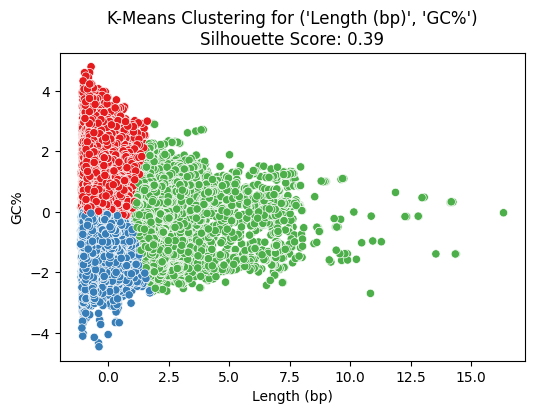

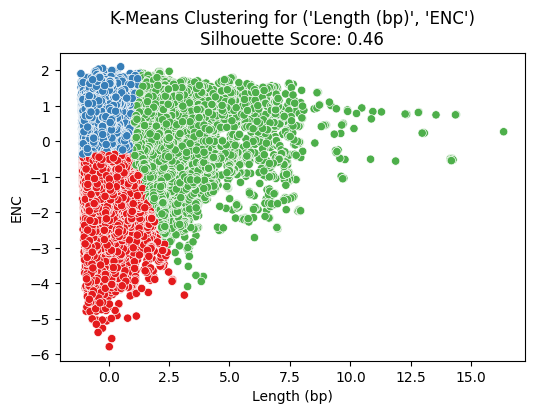

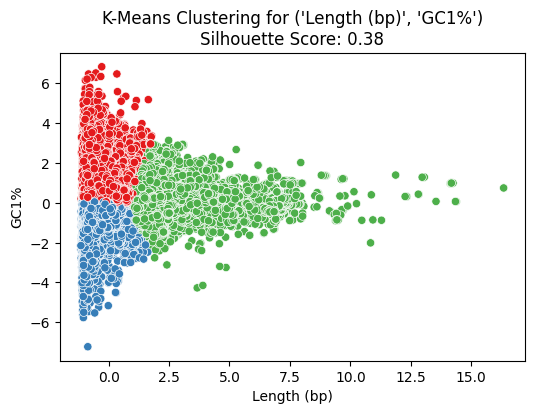

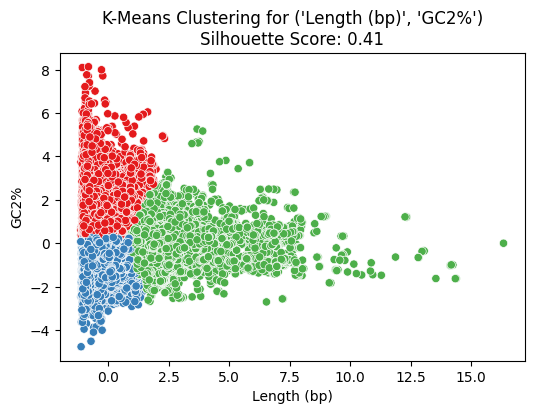

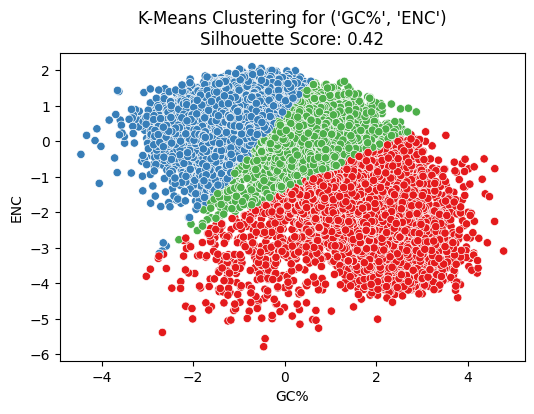

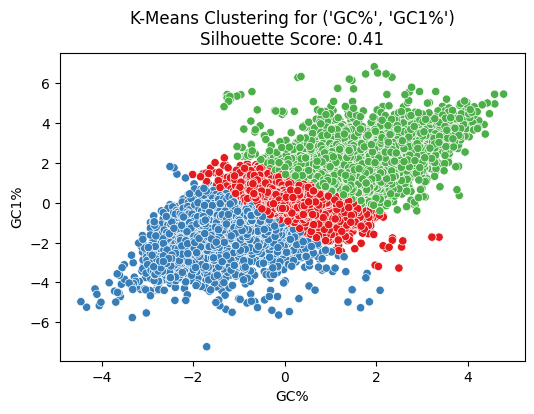

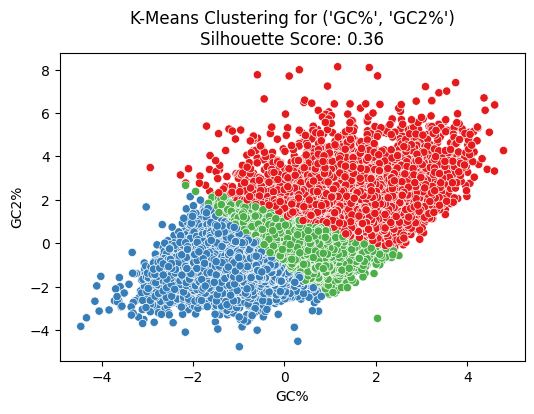

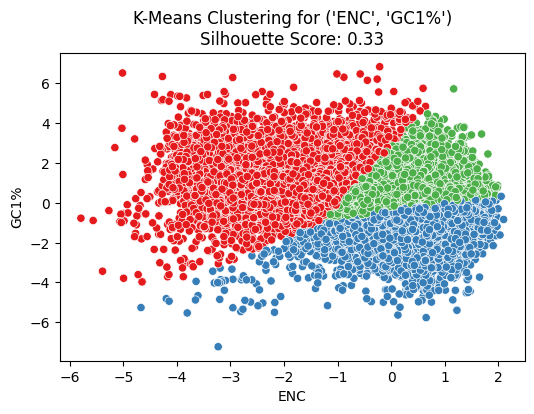

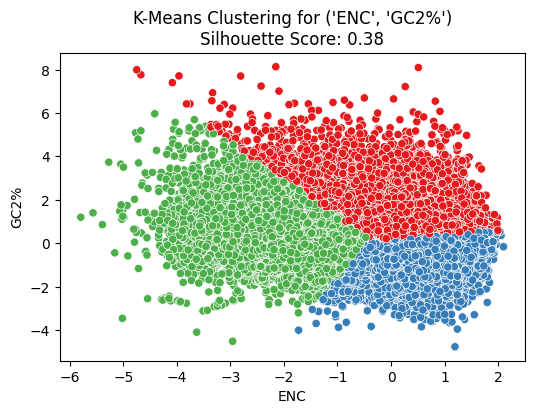

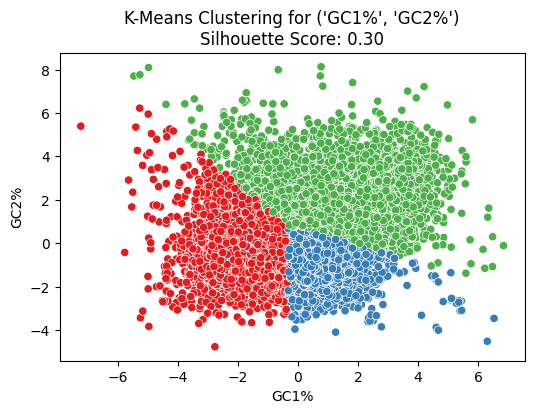

Top Feature Pairs Based on Silhouette Score:
              features  silhouette_score
1   (Length (bp), ENC)          0.455178
4           (GC%, ENC)          0.424815
3  (Length (bp), GC2%)          0.408479
5          (GC%, GC1%)          0.405018
0   (Length (bp), GC%)          0.390485


In [ ]:
import pandas as pd
import itertools
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select features (exclude labels column)
features = combined_df.columns[1:-2]

# Standardize the feature values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Generate all combinations of 2 features
feature_combinations = list(itertools.combinations(features, 2))
print("Possible combinations: ",feature_combinations)
# Initialize a list to store results
results = []

# Loop through each feature combination
for combo in feature_combinations:
    # Extract the two features
    X = scaled_df[list(combo)].values

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X)

    # Compute Silhouette Score
    score = silhouette_score(X, labels)
    results.append({'features': combo, 'silhouette_score': score})

    # Visualize the clusters
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', legend=False)
    plt.title(f"K-Means Clustering for {combo}\nSilhouette Score: {score:.2f}")
    plt.xlabel(combo[0])
    plt.ylabel(combo[1])
    plt.show()

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results)

# Sort results by Silhouette Score
results_df = results_df.sort_values(by='silhouette_score', ascending=False)
print("Top Feature Pairs Based on Silhouette Score:")
print(results_df.head())


From the performance of KMeans we can conclude that Length(bp) and ENC serve as best features to distinguish between the species Esox_lucius, Anas_platyrhynchos and Ursus_maritimus